# Comparison of Classifiers to Identify the Star Type and finding Association rules using Astronomical Data# 

Objective: Comparitive study of classification algorithms.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Loading data

In [2]:
j=pd.read_csv(r"C:\Users\Shruti\Desktop\...shruti\JKLU\VI-SEM\Predictive_Analytics\STAR-Dataset.csv")

# Taking a look at data

In [3]:
j.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,3068,0.002400,0.1700,16.12,0,Red,M,NaN,NaN,NaN,NaN,NaN
1,3042,0.000500,0.1542,16.60,0,Red,M,NaN,NaN,NaN,NaN,NaN
2,2600,0.000300,0.1020,18.70,0,Red,M,NaN,NaN,NaN,NaN,NaN
3,2800,0.000200,0.1600,16.65,0,Red,M,NaN,NaN,NaN,NaN,NaN
4,1939,0.000138,0.1030,20.06,0,Red,M,NaN,NaN,NaN,NaN,NaN


In [4]:
jr=j.iloc[:,0:7]
jr

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.17000,16.120,0,Red,M
1,3042,0.000500,0.15420,16.600,0,Red,M
2,2600,0.000300,0.10200,18.700,0,Red,M
3,2800,0.000200,0.16000,16.650,0,Red,M
4,1939,0.000138,0.10300,20.060,0,Red,M
5,2840,0.000650,0.11000,16.980,0,Red,M
6,2637,0.000730,0.12700,17.220,0,Red,M
7,2600,0.000400,0.09600,17.400,0,Red,M
8,2650,0.000690,0.11000,17.450,0,Red,M
9,2700,0.000180,0.13000,16.050,0,Red,M


# Statistics

In [5]:
jr.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


# Descriptive Data Analytics

<function matplotlib.pyplot.show(*args, **kw)>

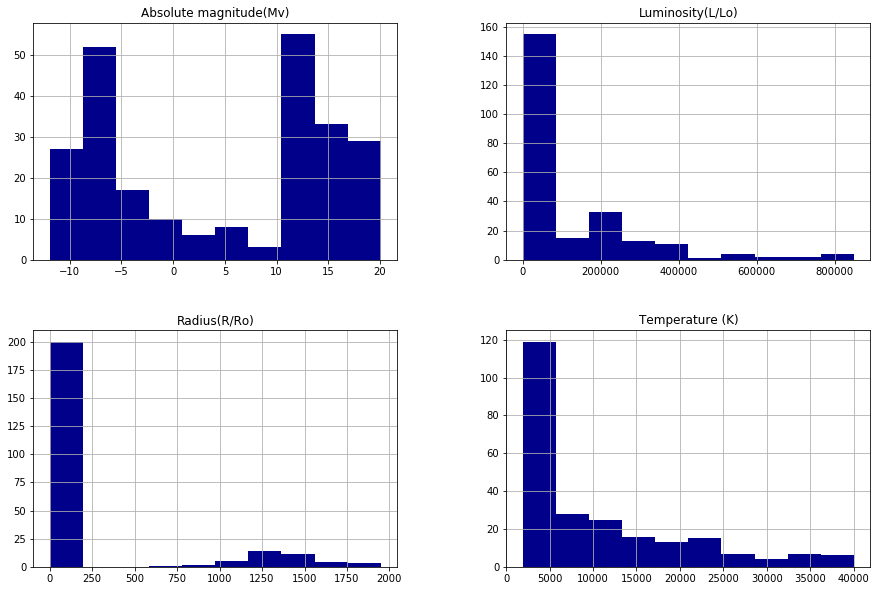

In [6]:
num=jr.iloc[:,0:4]
num.hist(figsize=(15,10),color='darkblue')
plt.show

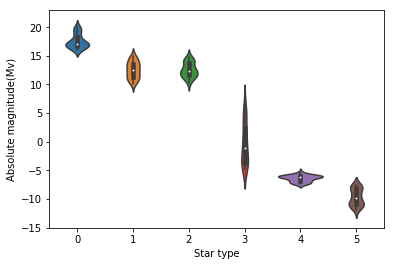

In [7]:
sns.violinplot(data=jr,x='Star type',y='Absolute magnitude(Mv)')

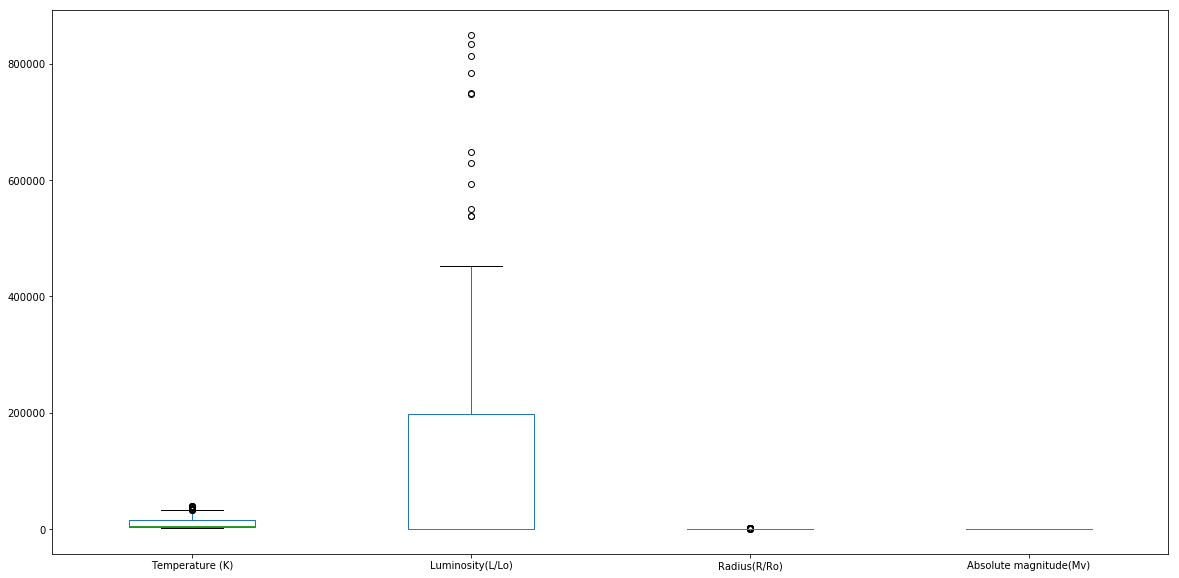

In [8]:
num.plot(kind='box', figsize=(20,10))
# jr.boxplot(by='Star type', figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027571D40550>,
      dtype=object)

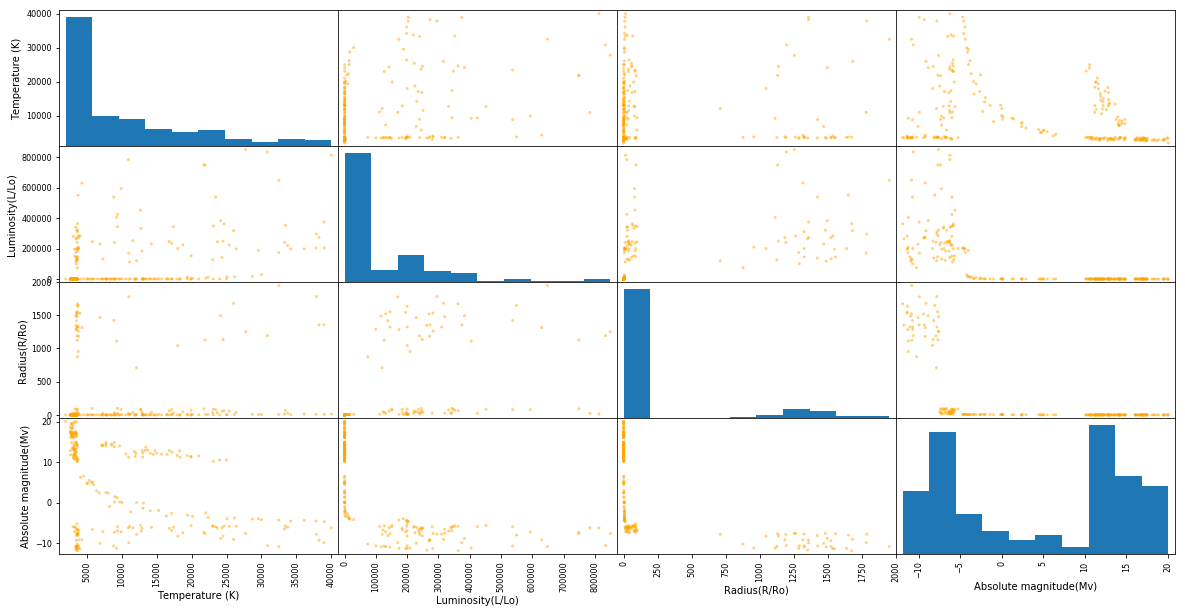

In [9]:
pd.plotting.scatter_matrix(num,figsize=(20,10),color="orange")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027572154048>,
      dtype=object)

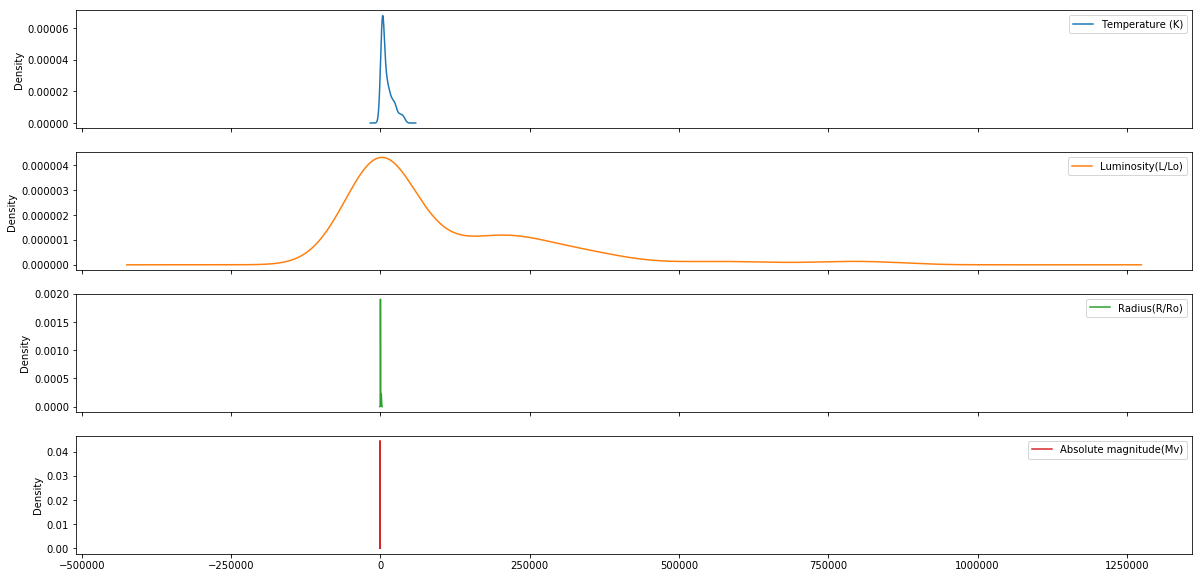

In [10]:
num.plot(kind='density',figsize=(20,10),subplots=True)

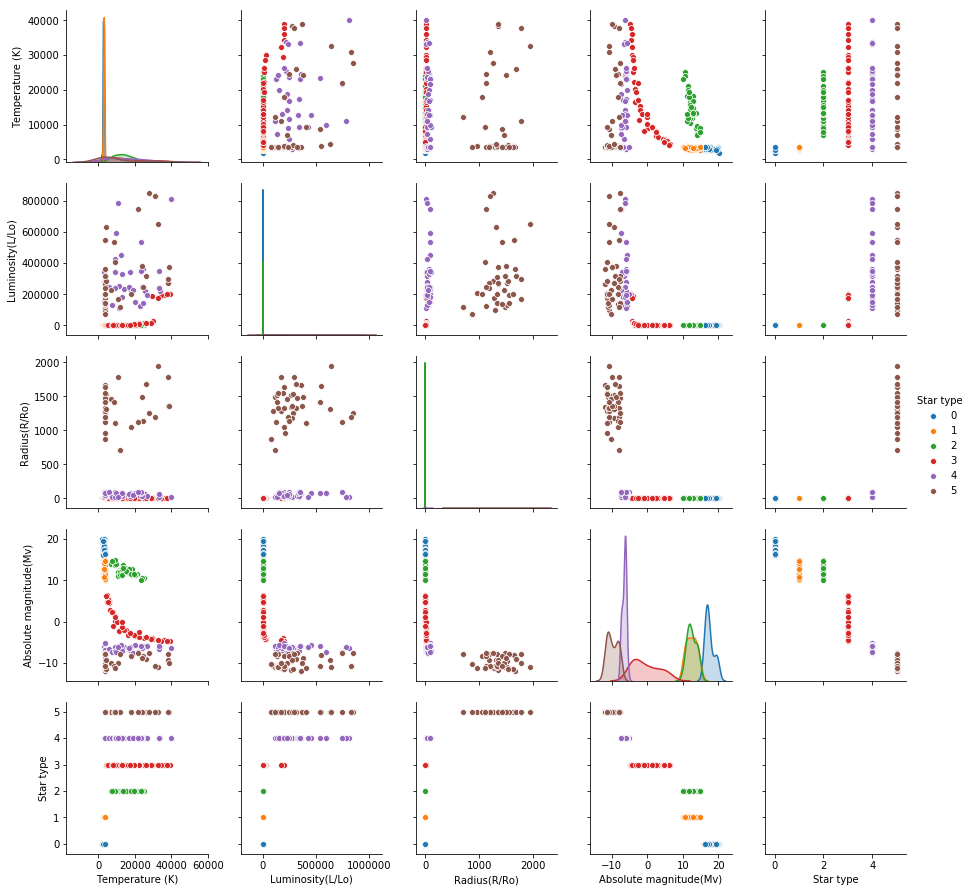

In [11]:
sns.pairplot(jr,hue="Star type")

<function matplotlib.pyplot.show(*args, **kw)>

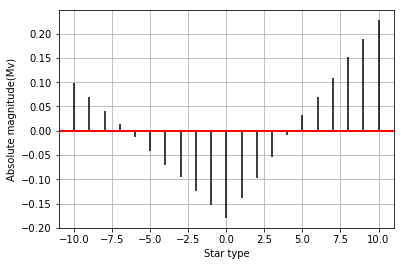

In [12]:
line=plt.xcorr(jr['Star type'],jr['Absolute magnitude(Mv)'])
plt.grid(True)
plt.ylabel('Absolute magnitude(Mv)')
plt.xlabel('Star type')
plt.axhline(0,color='red',lw=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

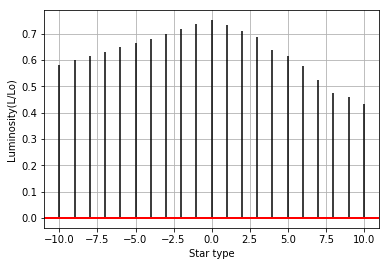

In [13]:
line=plt.xcorr(jr['Star type'],jr['Luminosity(L/Lo)'])
plt.ylabel('Luminosity(L/Lo)')
plt.xlabel('Star type')
plt.grid(True)
plt.axhline(0,color='red',lw=2)
plt.show

# HR Diagram

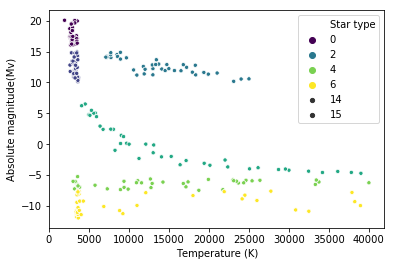

In [14]:
sns.scatterplot(data=jr,x='Temperature (K)',y='Absolute magnitude(Mv)',hue='Star type',size=15,palette='viridis')

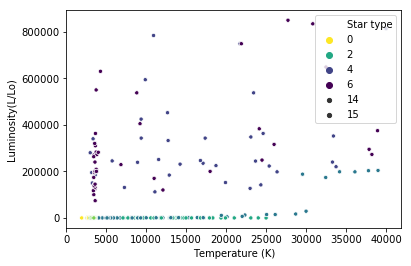

In [15]:
sns.scatterplot(data=jr,x='Temperature (K)',y='Luminosity(L/Lo)',hue='Star type',size=15,palette='viridis_r')

# Training

In [16]:
X = jr.drop(['Star type','Star color','Spectral Class'],axis=1)
y = jr['Star type']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [18]:
acc=[]
precision=[]
f1=[]
recall=[]
name=['Gaussian NB','Bernoulli NB','Stochastic Gradient Descent','K-NN','Logistic Regression','Random Forest','Decision Tree','SVM']

# GAUSSIAN NB

In [19]:
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)

In [20]:
print(nb_pred[0:5])
print(y_test[0:5])

[1 2 2 2 0]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

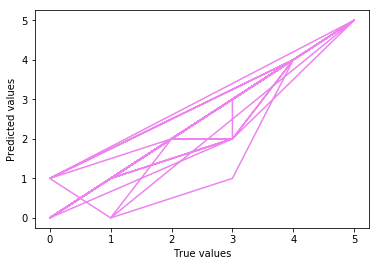

In [21]:
plt.plot(y_test,nb_pred,color='violet')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [22]:
gauss=pd.DataFrame(y_test)

In [23]:
gauss["gauss"]=nb_pred
gauss["lum"]=X_test["Luminosity(L/Lo)"]
gauss["temp"]=X_test["Temperature (K)"]
gauss["mag"]=X_test["Absolute magnitude(Mv)"]
gauss

,Star type,gauss,lum,temp,mag
199,1,1,0.002700,3463,14.776
90,3,2,0.590000,5300,5.490
89,2,2,0.001100,19860,11.340
91,3,2,0.153000,4526,6.506
68,0,0,0.000360,2774,17.390
209,2,2,0.001250,19360,11.620
70,1,1,0.021000,3345,12.300
69,0,0,0.000720,2871,19.430
203,2,2,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


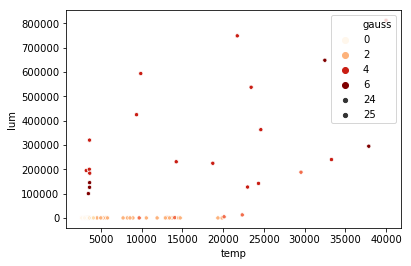

In [24]:
sns.scatterplot(data=gauss,x='temp',y='lum',size=25,hue='gauss',palette='OrRd')

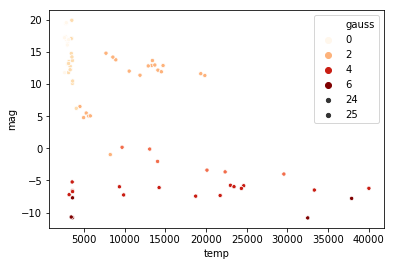

In [25]:
sns.scatterplot(data=gauss,x='temp',y='mag',size=25,hue='gauss',palette='OrRd')

In [26]:
print("Accuracy: Gaussian NB",accuracy_score(y_test,nb_pred))
acc.append(accuracy_score(y_test,nb_pred))

Accuracy: Gaussian NB 0.8333333333333334


In [27]:
print("Cross-Validation score: Gaussian NB",cross_val_score(nb,X,y,cv=10).mean())
# cv.append(cross_val_score(nb,X,y,cv=10).mean())

Cross-Validation score: Gaussian NB 0.8583333333333334


In [28]:
print("Confusion matrix for Random Gaussian NB\n",confusion_matrix(y_test,nb_pred))

Confusion matrix for Random Gaussian NB
 [[ 9  3  0  0  0  0]
 [ 2 11  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  6  6  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0  5]]


In [29]:
print("Classification report for Gaussian NB\n",classification_report(y_test,nb_pred))

Classification report for Gaussian NB
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.73      0.85      0.79        13
           2       0.70      1.00      0.82        14
           3       1.00      0.46      0.63        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         5

    accuracy                           0.83        72
   macro avg       0.88      0.84      0.84        72
weighted avg       0.86      0.83      0.82        72



In [30]:
f1.append(f1_score(y_test,nb_pred,average='weighted'))
precision.append(precision_score(y_test,nb_pred,average='weighted'))
recall.append(recall_score(y_test,nb_pred,average='weighted'))

# Bernoulli NB

In [31]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
bnb_pred=bnb.predict(X_test)

In [32]:
print(bnb_pred[0:5])
print(y_test[0:5])

[0 0 0 0 0]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

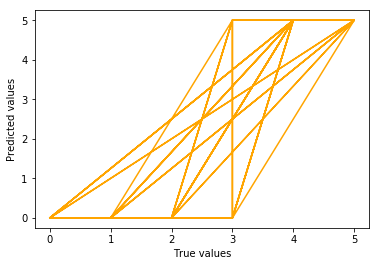

In [33]:
plt.plot(y_test,bnb_pred, color='orange')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [34]:
bern=pd.DataFrame(y_test)

In [35]:
bern["bern"]=bnb_pred
bern["lum"]=X_test["Luminosity(L/Lo)"]
bern["temp"]=X_test["Temperature (K)"]
bern["mag"]=X_test["Absolute magnitude(Mv)"]
bern

,Star type,bern,lum,temp,mag
199,1,0,0.002700,3463,14.776
90,3,0,0.590000,5300,5.490
89,2,0,0.001100,19860,11.340
91,3,0,0.153000,4526,6.506
68,0,0,0.000360,2774,17.390
209,2,0,0.001250,19360,11.620
70,1,0,0.021000,3345,12.300
69,0,0,0.000720,2871,19.430
203,2,0,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


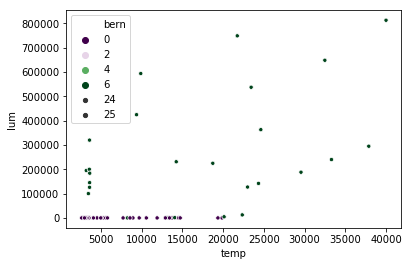

In [36]:
sns.scatterplot(data=bern,x='temp',y='lum',size=25,hue='bern',palette='PRGn')

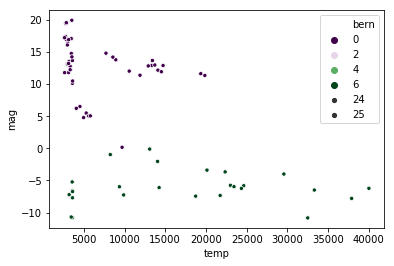

In [37]:
sns.scatterplot(data=bern,x='temp',y='mag',size=25,hue='bern',palette='PRGn')

In [38]:
print("Accuracy: Bernoulli NB",accuracy_score(y_test,bnb_pred))
acc.append(accuracy_score(y_test,bnb_pred))

Accuracy: Bernoulli NB 0.2361111111111111


In [39]:
print("Cross-Validation score: Bernoulli NB",cross_val_score(bnb,X,y,cv=10).mean())
# cv.append(cross_val_score(bnb,X,y,cv=10).mean())

Cross-Validation score: Bernoulli NB 0.33333333333333337


In [40]:
print("Confusion matrix for Bernoulli NB\n",confusion_matrix(y_test,bnb_pred))

Confusion matrix for Bernoulli NB
 [[12  0  0  0  0  0]
 [13  0  0  0  0  0]
 [14  0  0  0  0  0]
 [ 7  0  0  0  0  6]
 [ 0  0  0  0  0 15]
 [ 0  0  0  0  0  5]]


In [41]:
print("Classification report for Bernoulli NB\n",classification_report(y_test,bnb_pred))

Classification report for Bernoulli NB
               precision    recall  f1-score   support

           0       0.26      1.00      0.41        12
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        15
           5       0.19      1.00      0.32         5

    accuracy                           0.24        72
   macro avg       0.08      0.33      0.12        72
weighted avg       0.06      0.24      0.09        72



In [42]:
f1.append(f1_score(y_test,bnb_pred,average='weighted'))
precision.append(precision_score(y_test,bnb_pred,average='weighted'))
recall.append(recall_score(y_test,bnb_pred,average='weighted'))

# SGD

In [43]:
sg=SGDClassifier(loss="log",penalty="l1",max_iter=5)
sg.fit(X_train,y_train)
sg_pred=sg.predict(X_test)

In [44]:
print(sg_pred[0:5])
print(y_test[0:5])

[3 3 3 3 3]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

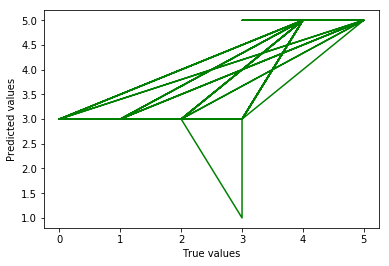

In [45]:
plt.plot(y_test,sg_pred,color='green')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [46]:
sgd=pd.DataFrame(y_test)

In [47]:
sgd["sg"]=sg_pred
sgd["lum"]=X_test["Luminosity(L/Lo)"]
sgd["temp"]=X_test["Temperature (K)"]
sgd["mag"]=X_test["Absolute magnitude(Mv)"]
sgd

,Star type,sg,lum,temp,mag
199,1,3,0.002700,3463,14.776
90,3,3,0.590000,5300,5.490
89,2,3,0.001100,19860,11.340
91,3,3,0.153000,4526,6.506
68,0,3,0.000360,2774,17.390
209,2,3,0.001250,19360,11.620
70,1,3,0.021000,3345,12.300
69,0,3,0.000720,2871,19.430
203,2,3,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


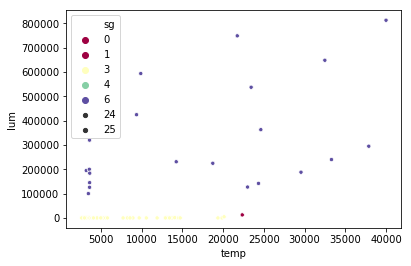

In [48]:
sns.scatterplot(data=sgd,x='temp',y='lum',size=25,hue='sg',palette='Spectral')

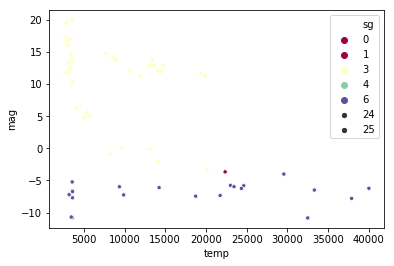

In [49]:
sns.scatterplot(data=sgd,x='temp',y='mag',size=25,hue='sg',palette='Spectral')

In [50]:
print("Accuracy: SGD",accuracy_score(y_test,sg_pred))
acc.append(accuracy_score(y_test,sg_pred))

Accuracy: SGD 0.2222222222222222


In [51]:
print("Cross-Validation score: SGD",cross_val_score(sg,X,y,cv=10).mean())
# cv.append(cross_val_score(sg,X,y,cv=10).mean())

Cross-Validation score: SGD 0.3041666666666667


In [52]:
print("Confusion matrix for SGD\n",confusion_matrix(y_test,sg_pred))

Confusion matrix for SGD
 [[ 0  0  0 12  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0 14  0  0]
 [ 0  1  0 11  0  1]
 [ 0  0  0  0  0 15]
 [ 0  0  0  0  0  5]]


In [53]:
print("Classification report for SGD\n",classification_report(y_test,sg_pred))

Classification report for SGD
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        14
           3       0.22      0.85      0.35        13
           4       0.00      0.00      0.00        15
           5       0.24      1.00      0.38         5

    accuracy                           0.22        72
   macro avg       0.08      0.31      0.12        72
weighted avg       0.06      0.22      0.09        72



In [54]:
f1.append(f1_score(y_test,sg_pred,average='weighted'))
precision.append(precision_score(y_test,sg_pred,average='weighted'))
recall.append(recall_score(y_test,sg_pred,average='weighted'))

# KNN

In [55]:
kn=KNeighborsClassifier(n_neighbors=6, metric ='euclidean')
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)

In [56]:
print(kn_pred[0:5])
print(y_test[0:5])

[0 3 2 1 0]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

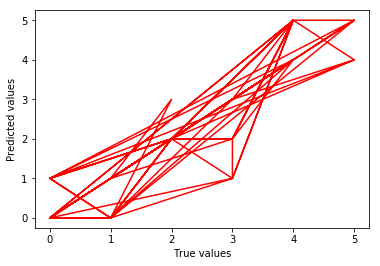

In [57]:
plt.plot(y_test,kn_pred,color='red')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [58]:
knn=pd.DataFrame(y_test)

In [59]:
knn["kn"]=kn_pred
knn["lum"]=X_test["Luminosity(L/Lo)"]
knn["temp"]=X_test["Temperature (K)"]
knn["mag"]=X_test["Absolute magnitude(Mv)"]
knn

,Star type,kn,lum,temp,mag
199,1,0,0.002700,3463,14.776
90,3,3,0.590000,5300,5.490
89,2,2,0.001100,19860,11.340
91,3,1,0.153000,4526,6.506
68,0,0,0.000360,2774,17.390
209,2,2,0.001250,19360,11.620
70,1,0,0.021000,3345,12.300
69,0,0,0.000720,2871,19.430
203,2,2,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


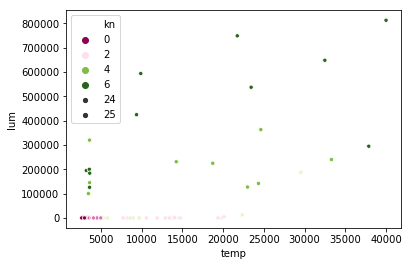

In [60]:
sns.scatterplot(data=knn,x='temp',y='lum',size=25,hue='kn',palette='PiYG')

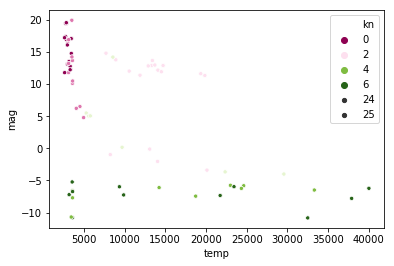

In [61]:
sns.scatterplot(data=knn,x='temp',y='mag',size=25,hue='kn',palette='PiYG')

In [62]:
print("Accuracy: KNN",accuracy_score(y_test,kn_pred))
acc.append(accuracy_score(y_test,kn_pred))

Accuracy: KNN 0.5972222222222222


In [63]:
print("Cross-Validation score: KNN",cross_val_score(kn,X,y,cv=10).mean())
# cv.append(cross_val_score(kn,X,y,cv=10).mean())

Cross-Validation score: KNN 0.5958333333333334


In [64]:
print("Confusion matrix for KNN\n",confusion_matrix(y_test,kn_pred))

Confusion matrix for KNN
 [[ 8  4  0  0  0  0]
 [ 7  6  0  0  0  0]
 [ 0  0 13  1  0  0]
 [ 0  3  4  6  0  0]
 [ 0  0  0  0  7  8]
 [ 0  0  0  0  2  3]]


In [65]:
print("Classification report for KNN\n",classification_report(y_test,kn_pred))

Classification report for KNN
               precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.46      0.46      0.46        13
           2       0.76      0.93      0.84        14
           3       0.86      0.46      0.60        13
           4       0.78      0.47      0.58        15
           5       0.27      0.60      0.37         5

    accuracy                           0.60        72
   macro avg       0.61      0.60      0.58        72
weighted avg       0.66      0.60      0.60        72



In [66]:
f1.append(f1_score(y_test,kn_pred,average='weighted'))
precision.append(precision_score(y_test,kn_pred,average='weighted'))
recall.append(recall_score(y_test,kn_pred,average='weighted'))

# Logistic Regression

In [67]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [68]:
print(lr_pred[0:5])
print(y_test[0:5])

[1 2 2 2 0]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

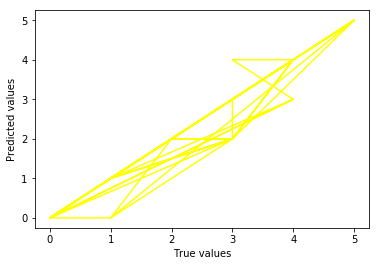

In [69]:
plt.plot(y_test,lr_pred,color='yellow')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [70]:
lr=pd.DataFrame(y_test)

In [71]:
lr["lr"]=lr_pred
lr["lum"]=X_test["Luminosity(L/Lo)"]
lr["temp"]=X_test["Temperature (K)"]
lr["mag"]=X_test["Absolute magnitude(Mv)"]
lr

,Star type,lr,lum,temp,mag
199,1,1,0.002700,3463,14.776
90,3,2,0.590000,5300,5.490
89,2,2,0.001100,19860,11.340
91,3,2,0.153000,4526,6.506
68,0,0,0.000360,2774,17.390
209,2,2,0.001250,19360,11.620
70,1,1,0.021000,3345,12.300
69,0,0,0.000720,2871,19.430
203,2,2,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


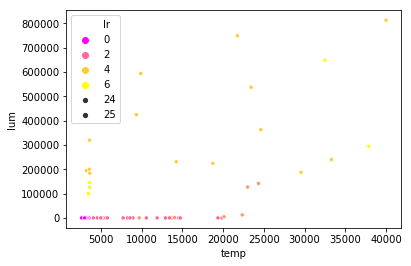

In [72]:
sns.scatterplot(data=lr,x='temp',y='lum',size=25,hue='lr',palette='spring')

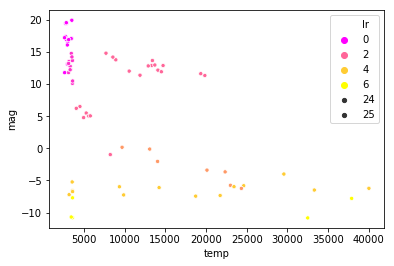

In [73]:
sns.scatterplot(data=lr,x='temp',y='mag',size=25,hue='lr',palette='spring')

In [74]:
print("Accuracy: Logistic Regression",accuracy_score(y_test,lr_pred))
acc.append(accuracy_score(y_test,lr_pred))

Accuracy: Logistic Regression 0.8333333333333334


In [75]:
print("Confusion matrix for Logistic Regression\n",confusion_matrix(y_test,lr_pred))

Confusion matrix for Logistic Regression
 [[12  0  0  0  0  0]
 [ 2 11  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  7  5  1  0]
 [ 0  0  0  2 13  0]
 [ 0  0  0  0  0  5]]


In [76]:
print("Classification report for Logistic Regression\n",classification_report(y_test,lr_pred))

Classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.85      0.92        13
           2       0.67      1.00      0.80        14
           3       0.71      0.38      0.50        13
           4       0.93      0.87      0.90        15
           5       1.00      1.00      1.00         5

    accuracy                           0.83        72
   macro avg       0.86      0.85      0.84        72
weighted avg       0.84      0.83      0.82        72



In [77]:
f1.append(f1_score(y_test,lr_pred,average='weighted'))
precision.append(precision_score(y_test,lr_pred,average='weighted'))
recall.append(recall_score(y_test,lr_pred,average='weighted'))

# Random Forest

In [78]:
Random=RandomForestClassifier(n_estimators=5)
Random.fit(X_train,y_train)
kp_pred=Random.predict(X_test)

In [79]:
print(kp_pred[0:5])
print(y_test[0:5])

[1 1 2 1 0]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

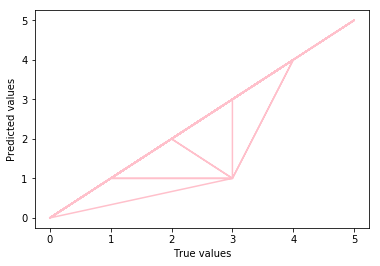

In [80]:
plt.plot(y_test,kp_pred,color='pink')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [81]:
rf=pd.DataFrame(y_test)

In [82]:
rf["rf"]=kp_pred
rf["lum"]=X_test["Luminosity(L/Lo)"]
rf["temp"]=X_test["Temperature (K)"]
rf["mag"]=X_test["Absolute magnitude(Mv)"]
rf

,Star type,rf,lum,temp,mag
199,1,1,0.002700,3463,14.776
90,3,1,0.590000,5300,5.490
89,2,2,0.001100,19860,11.340
91,3,1,0.153000,4526,6.506
68,0,0,0.000360,2774,17.390
209,2,2,0.001250,19360,11.620
70,1,1,0.021000,3345,12.300
69,0,0,0.000720,2871,19.430
203,2,2,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


In [83]:
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

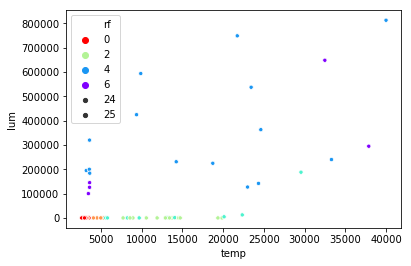

In [84]:
sns.scatterplot(data=rf,x='temp',y='lum',size=25,hue='rf',palette='rainbow_r')

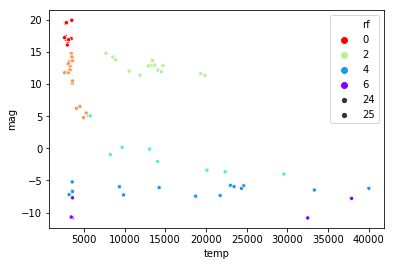

In [85]:
sns.scatterplot(data=rf,x='temp',y='mag',size=25,hue='rf',palette='rainbow_r')

In [86]:
print("Accuracy: Random forest",accuracy_score(y_test,kp_pred))
acc.append(accuracy_score(y_test,kp_pred))

Accuracy: Random forest 0.9444444444444444


In [87]:
print("Cross-Validation score: Random forest",cross_val_score(Random,X,y,cv=10).mean())
# cv.append(cross_val_score(Random,X,y,cv=10).mean())

Cross-Validation score: Random forest 1.0


In [88]:
print("Confusion matrix for Random Forest\n",confusion_matrix(y_test,kp_pred))

Confusion matrix for Random Forest
 [[12  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  4  0  9  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0  5]]


In [89]:
print("Classification report for Random Forest\n",classification_report(y_test,kp_pred))

Classification report for Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.76      1.00      0.87        13
           2       1.00      1.00      1.00        14
           3       1.00      0.69      0.82        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         5

    accuracy                           0.94        72
   macro avg       0.96      0.95      0.95        72
weighted avg       0.96      0.94      0.94        72



In [90]:
f1.append(f1_score(y_test,kp_pred,average='weighted'))
precision.append(precision_score(y_test,kp_pred,average='weighted'))
recall.append(recall_score(y_test,kp_pred,average='weighted'))

# Decision Tree

In [91]:
D_Tree=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10)
D_Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
Tree_predicted=D_Tree.predict(X_test)

In [93]:
print(Tree_predicted[0:5])
print(y_test[0:5])

[1 3 2 3 0]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

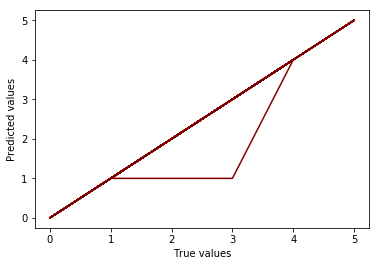

In [94]:
plt.plot(y_test,Tree_predicted,color='maroon')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [95]:
dt=pd.DataFrame(y_test)

In [96]:
dt["dt"]=Tree_predicted
dt["lum"]=X_test["Luminosity(L/Lo)"]
dt["temp"]=X_test["Temperature (K)"]
dt["mag"]=X_test["Absolute magnitude(Mv)"]
dt

,Star type,dt,lum,temp,mag
199,1,1,0.002700,3463,14.776
90,3,3,0.590000,5300,5.490
89,2,2,0.001100,19860,11.340
91,3,3,0.153000,4526,6.506
68,0,0,0.000360,2774,17.390
209,2,2,0.001250,19360,11.620
70,1,1,0.021000,3345,12.300
69,0,0,0.000720,2871,19.430
203,2,2,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


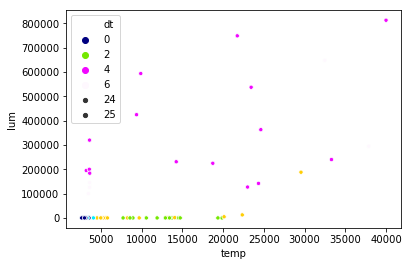

In [97]:
sns.scatterplot(data=dt,x='temp',y='lum',size=25,hue='dt',palette='gist_ncar')

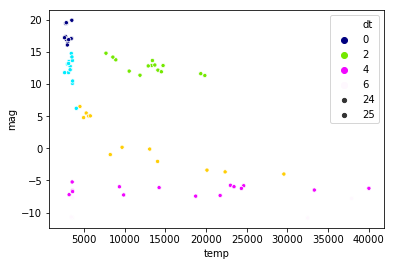

In [98]:
sns.scatterplot(data=dt,x='temp',y='mag',size=25,hue='dt',palette='gist_ncar')

In [99]:
print("Accuracy: Decision Tree",accuracy_score(y_test,Tree_predicted))
acc.append(accuracy_score(y_test,Tree_predicted))

Accuracy: Decision Tree 0.9861111111111112


In [100]:
print("Cross validation score: Decision Tree",cross_val_score(D_Tree,X,y,cv=10).mean())
# cv.append(cross_val_score(D_Tree,X,y,cv=10).mean())

Cross validation score: Decision Tree 0.9958333333333333


In [101]:
print("Confusion matrix for Decision Tree\n",confusion_matrix(y_test,Tree_predicted))

Confusion matrix for Decision Tree
 [[12  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  0 12  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0  5]]


In [102]:
print("Classification report for Decision Tree\n",classification_report(y_test,Tree_predicted))

Classification report for Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        14
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         5

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



In [103]:
f1.append(f1_score(y_test,Tree_predicted,average='weighted'))
precision.append(precision_score(y_test,Tree_predicted,average='weighted'))
recall.append(recall_score(y_test,Tree_predicted,average='weighted'))

# SVM

In [104]:
SV=svm.SVC(kernel='rbf',gamma='auto',class_weight='balanced')
SV.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
y_pred=SV.predict(X_test)

In [106]:
print(y_pred[0:5])
print(y_test[0:5])

[5 5 5 5 5]
199    1
90     3
89     2
91     3
68     0
Name: Star type, dtype: int64


Text(0,0.5,'Predicted values')

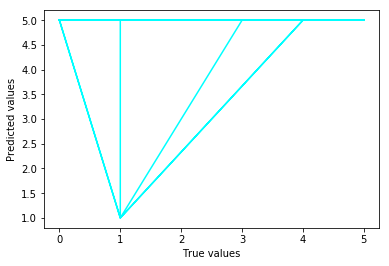

In [107]:
plt.plot(y_test,y_pred,color='cyan')
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [108]:
svm=pd.DataFrame(y_test)

In [109]:
svm["sv"]=y_pred
svm["lum"]=X_test["Luminosity(L/Lo)"]
svm["temp"]=X_test["Temperature (K)"]
svm["mag"]=X_test["Absolute magnitude(Mv)"]
svm

,Star type,sv,lum,temp,mag
199,1,5,0.002700,3463,14.776
90,3,5,0.590000,5300,5.490
89,2,5,0.001100,19860,11.340
91,3,5,0.153000,4526,6.506
68,0,5,0.000360,2774,17.390
209,2,5,0.001250,19360,11.620
70,1,5,0.021000,3345,12.300
69,0,5,0.000720,2871,19.430
203,2,5,0.001090,13340,12.900
232,5,5,648430.000000,32489,-10.840


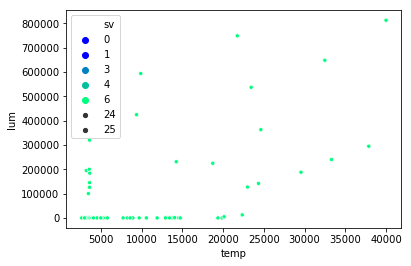

In [110]:
sns.scatterplot(data=svm,x='temp',y='lum',size=25,hue='sv',palette='winter')

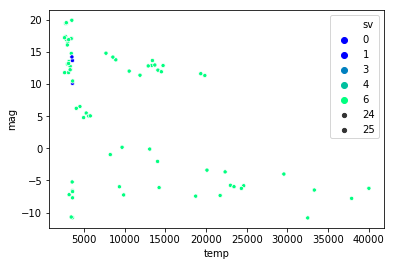

In [111]:
sns.scatterplot(data=svm,x='temp',y='mag',size=25,hue='sv',palette='winter')

In [112]:
print("Accuracy:SVM",accuracy_score(y_test,y_pred))
acc.append(accuracy_score(y_test,y_pred))

Accuracy:SVM 0.1111111111111111


In [113]:
print("Cross validation score: SVM",cross_val_score(SV,X,y,cv=10).mean())
# cv.append(cross_val_score(SV,X,y,cv=10).mean())

Cross validation score: SVM 0.2541666666666667


In [114]:
print("Confusion matrix for SVM\n",confusion_matrix(y_test,y_pred))

Confusion matrix for SVM
 [[ 0  0  0  0  0 12]
 [ 0  3  0  0  0 10]
 [ 0  0  0  0  0 14]
 [ 0  0  0  0  0 13]
 [ 0  0  0  0  0 15]
 [ 0  0  0  0  0  5]]


In [115]:
print("Classification report for SVM\n",classification_report(y_test,y_pred))

Classification report for SVM
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      0.23      0.38        13
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        15
           5       0.07      1.00      0.14         5

    accuracy                           0.11        72
   macro avg       0.18      0.21      0.09        72
weighted avg       0.19      0.11      0.08        72



In [116]:
f1.append(f1_score(y_test,y_pred,average='weighted'))
precision.append(precision_score(y_test,y_pred,average='weighted'))
recall.append(recall_score(y_test,y_pred,average='weighted'))

Text(0.5,1,'SVM')

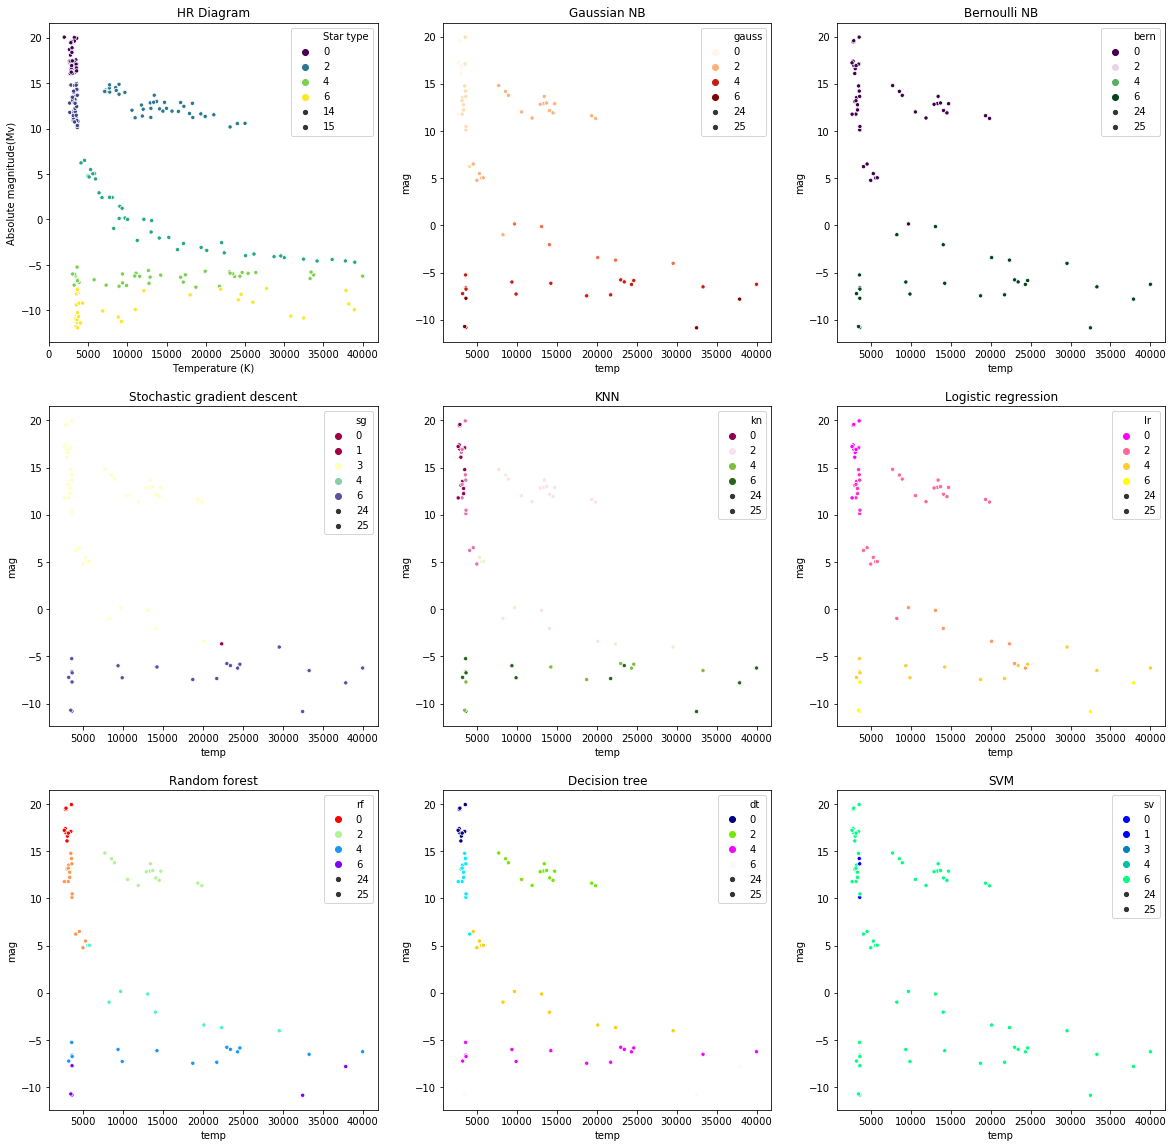

In [117]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.scatterplot(data=jr,x='Temperature (K)',y='Absolute magnitude(Mv)',hue='Star type',size=15,palette='viridis')
plt.title('HR Diagram')
plt.subplot(3,3,2)
sns.scatterplot(data=gauss,x='temp',y='mag',size=25,hue='gauss',palette='OrRd')
plt.title('Gaussian NB')
plt.subplot(3,3,3)
sns.scatterplot(data=bern,x='temp',y='mag',size=25,hue='bern',palette='PRGn')
plt.title('Bernoulli NB')
plt.subplot(3,3,4)
sns.scatterplot(data=sgd,x='temp',y='mag',size=25,hue='sg',palette='Spectral')
plt.title('Stochastic gradient descent')
plt.subplot(3,3,5)
sns.scatterplot(data=knn,x='temp',y='mag',size=25,hue='kn',palette='PiYG')
plt.title('KNN')
plt.subplot(3,3,6)
sns.scatterplot(data=lr,x='temp',y='mag',size=25,hue='lr',palette='spring')
plt.title('Logistic regression')
plt.subplot(3,3,7)
sns.scatterplot(data=rf,x='temp',y='mag',size=25,hue='rf',palette='rainbow_r')
plt.title('Random forest')
plt.subplot(3,3,8)
sns.scatterplot(data=dt,x='temp',y='mag',size=25,hue='dt',palette='gist_ncar')
plt.title('Decision tree')
plt.subplot(3,3,9)
sns.scatterplot(data=svm,x='temp',y='mag',size=25,hue='sv',palette='winter')
plt.title('SVM')

Text(0.5,1,'SVM')

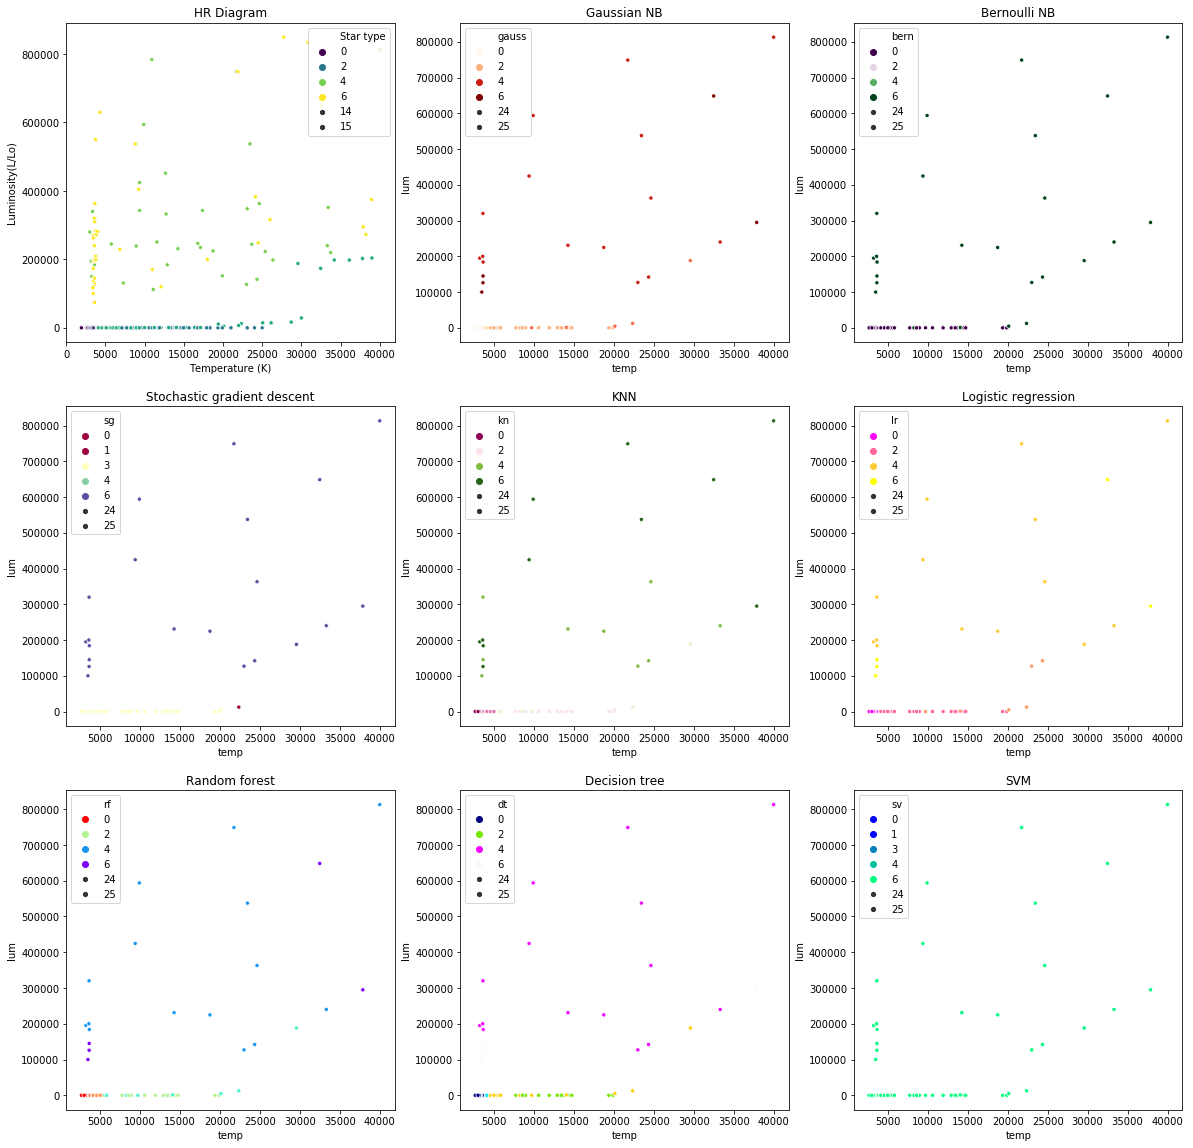

In [118]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.scatterplot(data=jr,x='Temperature (K)',y='Luminosity(L/Lo)',hue='Star type',size=15,palette='viridis')
plt.title('HR Diagram')
plt.subplot(3,3,2)
sns.scatterplot(data=gauss,x='temp',y='lum',size=25,hue='gauss',palette='OrRd')
plt.title('Gaussian NB')
plt.subplot(3,3,3)
sns.scatterplot(data=bern,x='temp',y='lum',size=25,hue='bern',palette='PRGn')
plt.title('Bernoulli NB')
plt.subplot(3,3,4)
sns.scatterplot(data=sgd,x='temp',y='lum',size=25,hue='sg',palette='Spectral')
plt.title('Stochastic gradient descent')
plt.subplot(3,3,5)
sns.scatterplot(data=knn,x='temp',y='lum',size=25,hue='kn',palette='PiYG')
plt.title('KNN')
plt.subplot(3,3,6)
sns.scatterplot(data=lr,x='temp',y='lum',size=25,hue='lr',palette='spring')
plt.title('Logistic regression')
plt.subplot(3,3,7)
sns.scatterplot(data=rf,x='temp',y='lum',size=25,hue='rf',palette='rainbow_r')
plt.title('Random forest')
plt.subplot(3,3,8)
sns.scatterplot(data=dt,x='temp',y='lum',size=25,hue='dt',palette='gist_ncar')
plt.title('Decision tree')
plt.subplot(3,3,9)
sns.scatterplot(data=svm,x='temp',y='lum',size=25,hue='sv',palette='winter')
plt.title('SVM')

Text(0.5,1,'SVM')

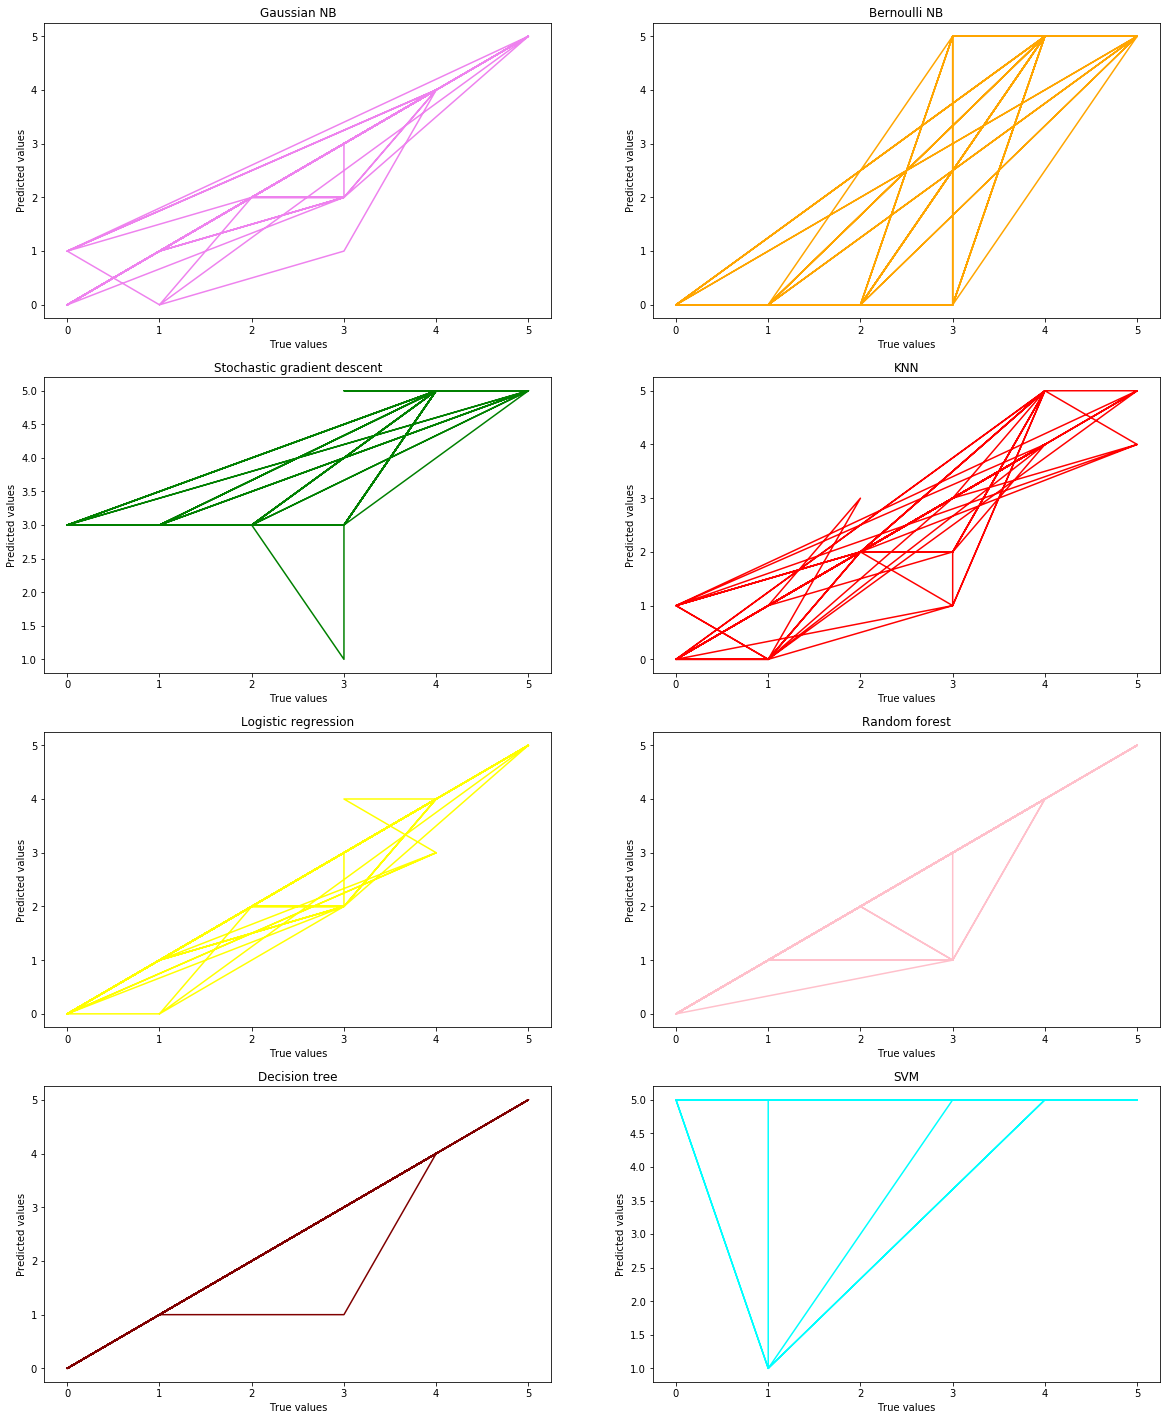

In [119]:
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
plt.plot(y_test,nb_pred,color='violet')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('Gaussian NB')
plt.subplot(4,2,2)
plt.plot(y_test,bnb_pred, color='orange')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('Bernoulli NB')
plt.subplot(4,2,3)
plt.plot(y_test,sg_pred,color='green')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('Stochastic gradient descent')
plt.subplot(4,2,4)
plt.plot(y_test,kn_pred,color='red')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('KNN')
plt.subplot(4,2,5)
plt.plot(y_test,lr_pred,color='yellow')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('Logistic regression')
plt.subplot(4,2,6)
plt.plot(y_test,kp_pred,color='pink')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('Random forest')
plt.subplot(4,2,7)
plt.plot(y_test,Tree_predicted,color='maroon')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('Decision tree')
plt.subplot(4,2,8)
plt.plot(y_test,y_pred,color='cyan')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title('SVM')

# Comparison

In [120]:
comparison_table=pd.DataFrame(name,columns=['Algorithm'])
comparison_table["Accuracy score"]=acc
comparison_table["Precision score"]=precision
comparison_table["F1 score"]=f1
comparison_table["Recall score"]=recall
comparison_table

,Algorithm,Accuracy score,Precision score,F1 score,Recall score
0,Gaussian NB,0.833333,0.863215,0.824243,0.833333
1,Bernoulli NB,0.236111,0.056833,0.091367,0.236111
2,Stochastic Gradient Descent,0.222222,0.056257,0.089761,0.222222
3,K-NN,0.597222,0.656653,0.601084,0.597222
4,Logistic Regression,0.833333,0.844907,0.821415,0.833333
5,Random Forest,0.944444,0.957516,0.943098,0.944444
6,Decision Tree,0.986111,0.987103,0.986091,0.986111
7,SVM,0.111111,0.185588,0.077093,0.111111


# Result

Comparison shows Decision Tree is the Victor!